In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 

The following command should be run from the user account you're interested in investigating, where <output_file.txt> shouls then be specified as the `filetoexamine` in the block below, and the user account from which the command is run should be loaded into the `user` variable below. The code currently works within a single month, so run this command within the space of a single year (format = `YYYY-MM-DD`), and then specify the number of the month you're interested in in the block below. 

```
sacct -p --starttime <start-date> --format=User,JobID,Jobname,partition,state,time,start,end,elapsed,MaxRss,MaxVMSize,nnodes,ncpus,nodelist > slurm_stats_3.txt
```

In [2]:
## SET THESE VARIABLES
filetoexamine = "/vortexfs1/omics/alexander/akrinos/eukniqueV2/slurm_stats_4.txt"
user = "akrinos"
partition = "scavenger"
plotname = "arianna_plot"
month = 5

df = pd.read_csv(filetoexamine, sep = "|")

df = df.loc[df["User"] == user]
df = df.loc[df["State"] != "PENDING"]
df = df.loc[df["State"] != "RUNNING"]
df = df.loc[df["Partition"] == partition]

In [4]:
def convertDecTime(curr):
    final = float(int((curr.split("-")[len(curr.split("-"))-1]).split("T")[0]) + \
                        (int(curr.split(":")[0].split("T")[len(curr.split("T"))-1]) / 24) + \
                        (int((curr.split(":")[len(curr.split(":"))-2].split(":")[0])) / 24 / 60) + \
                        (int((curr.split(":")[len(curr.split(":"))-1])) / 24 / 60 / 60))
    return final

def getMonth(curr):
    final = int((curr.split("-")[len(curr.split("-"))-2]))
    return final

df["StartHour"] = [convertDecTime(curr) for curr in df["Start"]]
df["EndHour"] = [convertDecTime(curr) for curr in df["End"]]
df["Month"] = [getMonth(curr) for curr in df["Start"]]
df["MonthEnd"] = [getMonth(curr) for curr in df["End"]]

df = df.loc[(df["Month"] == month) & (df["MonthEnd"] == month)] # Choose the jobs that are fully in May

def convertElapsed(time_in):
    final = 0
    if "-" in time_in:
        final = final + int(time_in.split("-")[0]) 
        time_in = time_in.split("-")[1]
    final = final + int(time_in.split(":")[0]) / 24 + \
        int(time_in.split(":")[1]) / 24 / 60+ \
        int(time_in.split(":")[2]) / 24 / 60 / 60
    return final
    
df["ElapsedNum"] = [convertElapsed(curr) for curr in df["Elapsed"]]

def convertToNodeList(nodelist_in):
    if "[" in nodelist_in:
        insidebrackets = nodelist_in.split("[")
        insidebrackets = insidebrackets[len(insidebrackets)-1].split("]")[0].split(",")
        numlist = []
        for n in insidebrackets:
            if "-" in n:
                limits = n.split("-")
                numlist.extend([str(curr) for curr in list(range(int(limits[0]),int(limits[1])+1))])
            else:
                numlist.append(n)
                
        return "pn".join(numlist)
    else:
        return nodelist_in
    
df["NodelistSplit"] = [convertToNodeList(curr) for curr in df["NodeList"]]
    
df.iloc[1:20,:]

,User,JobID,JobName,Partition,State,Timelimit,Start,End,Elapsed,MaxRSS,...,NNodes,NCPUS,NodeList,Unnamed: 14,StartHour,EndHour,Month,MonthEnd,ElapsedNum,NodelistSplit
57,akrinos,616550,snake-submit.sh,scavenger,FAILED,3-11:20:00,2020-05-01T13:38:56,2020-05-01T16:31:27,02:52:31,NaN,...,1,1,pn121,NaN,1.568704,1.688507,5,5,0.119803,pn121
102,akrinos,616930,snake-submit.sh,scavenger,FAILED,3-11:20:00,2020-05-01T19:03:40,2020-05-01T22:59:57,03:56:17,NaN,...,1,1,pn073,NaN,1.794213,1.958299,5,5,0.164086,pn073
147,akrinos,618683,snake-submit.sh,scavenger,FAILED,3-11:20:00,2020-05-02T08:42:58,2020-05-02T08:43:03,00:00:05,NaN,...,1,1,pn101,NaN,2.363171,2.363229,5,5,0.000058,pn101
153,akrinos,618685,snake-submit.sh,scavenger,FAILED,3-11:20:00,2020-05-02T08:46:58,2020-05-02T08:52:49,00:05:51,NaN,...,1,1,pn101,NaN,2.365949,2.370012,5,5,0.004063,pn101
156,akrinos,618686,batseukrhythmic.velvet.assembly=SRR1810209,scavenger,FAILED,6-22:40:00,2020-05-02T08:47:01,2020-05-02T08:47:11,00:00:10,NaN,...,3,8,pn[126-128],NaN,2.365984,2.366100,5,5,0.000116,126pn127pn128
159,akrinos,618687,batseukrhythmic.velvet.assembly=SRR1810206,scavenger,FAILED,6-22:40:00,2020-05-02T08:47:01,2020-05-02T08:47:11,00:00:10,NaN,...,3,8,pn[129-131],NaN,2.365984,2.366100,5,5,0.000116,129pn130pn131
168,akrinos,618690,batseukrhythmic.velvet.assembly=SRR1810799,scavenger,FAILED,6-22:40:00,2020-05-02T08:47:01,2020-05-02T08:47:11,00:00:10,NaN,...,3,8,pn[132-134],NaN,2.365984,2.366100,5,5,0.000116,132pn133pn134
174,akrinos,618692,batseukrhythmic.velvet.assembly=SRR1810210,scavenger,FAILED,6-22:40:00,2020-05-02T08:47:01,2020-05-02T08:47:11,00:00:10,NaN,...,3,8,pn[113-115],NaN,2.365984,2.366100,5,5,0.000116,113pn114pn115
180,akrinos,618694,batseukrhythmic.velvet.assembly=SRR1810205,scavenger,FAILED,6-22:40:00,2020-05-02T08:47:01,2020-05-02T08:47:11,00:00:10,NaN,...,3,8,pn[116-118],NaN,2.365984,2.366100,5,5,0.000116,116pn117pn118
183,akrinos,618695,batseukrhythmic.velvet.assembly=SRR1945045,scavenger,FAILED,6-22:40:00,2020-05-02T08:47:01,2020-05-02T08:47:11,00:00:10,NaN,...,3,8,pn[119-121],NaN,2.365984,2.366100,5,5,0.000116,119pn120pn121


In [5]:
min_day = min([math.floor(min(df["StartHour"])), math.floor(min(df["EndHour"]))])
max_day = max([math.floor(max(df["StartHour"])), math.floor(max(df["EndHour"]))])

range_times = []
range_clock = np.arange(0.0, 1.0, 0.0005) # 0.0005 of a day is about 3/4 of a minute
print(range_clock)
for s in range(min_day, max_day + 1):
    range_times.extend([s + curr for curr in range_clock])
    
chosen_cols_add = ["NNodes","MaxVMSize","NCPUS"]
chosen_cols_mean = ["ElapsedNum"]
chosen_cols_unique = ["NodelistSplit"]
fullindex = ["Time"] + chosen_cols_add + chosen_cols_mean + chosen_cols_unique
hourly_stats = pd.DataFrame(columns = fullindex)
for curr_time in range_times:
    currently_running = df.loc[(df["StartHour"] <= curr_time) & (df["EndHour"] >= curr_time)]
    allnodes = set()
    for i in currently_running["NodelistSplit"]:
        currlist1 = i.split("pn")
        currlist = []
        for c in currlist1:
            currlist.extend(c.split("sm"))
        if len(currlist) > 0:
            curriter = set([int(curr) for curr in currlist if (curr != "") & (curr != "None assigned")])
        allnodes = allnodes.union(curriter)
    
    # Summarize data at this timepoint
    to_summarize = currently_running[chosen_cols_add].sum()
    to_summarize_mean = currently_running[chosen_cols_mean].mean()
    to_summarize_unique_nodes = len(allnodes)
    
    # Append data to summary frame
    to_summarize = pd.Series([curr_time] + list(to_summarize) + list(to_summarize_mean) + \
                             [to_summarize_unique_nodes], index = fullindex)
    hourly_stats = hourly_stats.append(to_summarize, ignore_index = True)

[0.000e+00 5.000e-04 1.000e-03 ... 9.985e-01 9.990e-01 9.995e-01]


In [10]:
hourly_stats_time = hourly_stats.set_index("Time")
hourly_stats_time.iloc[10000:10020,:]

,NNodes,MaxVMSize,NCPUS,ElapsedNum,NodelistSplit
Time,,,,,
6.0000,1.0,0.0,1.0,2.429155,1.0
6.0005,1.0,0.0,1.0,2.429155,1.0
6.0010,1.0,0.0,1.0,2.429155,1.0
6.0015,1.0,0.0,1.0,2.429155,1.0
6.0020,1.0,0.0,1.0,2.429155,1.0
6.0025,1.0,0.0,1.0,2.429155,1.0
6.0030,1.0,0.0,1.0,2.429155,1.0
6.0035,1.0,0.0,1.0,2.429155,1.0
6.0040,1.0,0.0,1.0,2.429155,1.0


In [27]:
pd.set_option('display.max_rows', 2833)
hourly_stats.plot.scatter(x = "Time", y = "NNodes")
hourly_stats.plot.scatter(x = "Time", y = "NCPUS",color='red')

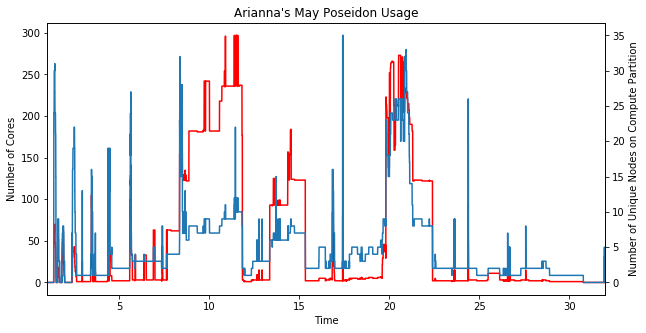

In [49]:
plt.figure(figsize=(15,7))
plt.xlabel("Day in May")

ax2 = hourly_stats_time.NCPUS.plot(color='red',label='Sum')
ax1 = hourly_stats_time["NodelistSplit"].plot(secondary_y="NodelistSplit",figsize = (10,5))

ax2.set_ylabel("Number of Cores")
ax1.set_ylabel("Number of Unique Nodes on Compute Partition")
ax1.set_title("Arianna's May Poseidon Usage")
plt.savefig(plotname + "_" + partition + "_coresandnodes.png", dpi = 500)

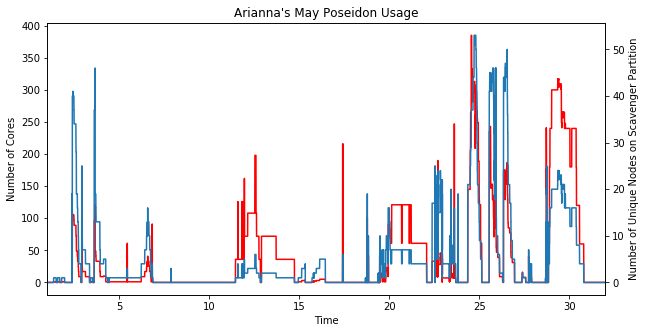

In [56]:
# This cell is retained to show what the output looked like for scavenger.

# Run for scavenger partition
plt.figure(figsize=(15,7))
plt.xlabel("Day in May")

ax2 = hourly_stats_time.NCPUS.plot(color='red',label='Sum')
ax1 = hourly_stats_time["NodelistSplit"].plot(secondary_y="NodelistSplit",figsize = (10,5))

ax2.set_ylabel("Number of Cores")
ax1.set_ylabel("Number of Unique Nodes on Scavenger Partition")
ax1.set_title("Arianna's May Poseidon Usage")
plt.savefig(plotname + "_" + partition + "_coresandnodes.png", dpi = 500)

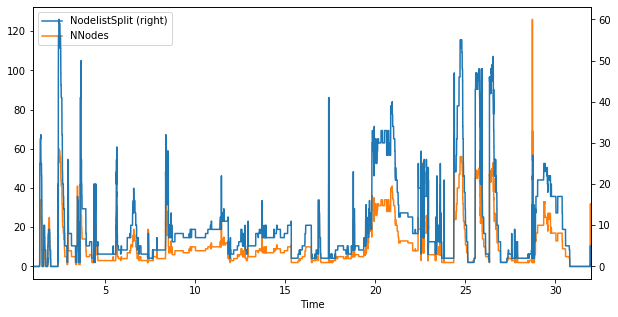

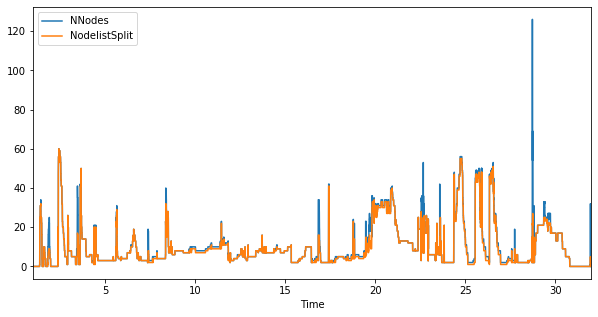

In [280]:
ax3 = hourly_stats_time[["NodelistSplit","NNodes"]].plot(secondary_y="NodelistSplit",figsize = (10,5))
plt.savefig(os.path.join("plots", plotname + "_" + partition + "_nodesvsunique.png"), dpi = 500)
ax4 = hourly_stats_time[["NNodes","NodelistSplit"]].plot(figsize = (10,5))
plt.savefig(os.path.join("plots", plotname + "_" + partition + "_nodesvsunique_oneaxis.png"), dpi = 500)

In [57]:
hourly_stats.to_csv(partition + "_" + user + "_" + month + ".csv")